# Experiment: Demonstrating an instance of MAE superiority

Vivek Gopalakrishnan | Nov 15, 2019


## Goal

Design a simulation where Mean Absolute Error (MAE) outperforms Mean Squared Error (MSE). 

In high-dimensional multivariate random forest regresion, the choise of split criteria is critical. However, in all our simulations so far, we have not been able to find a situtaion where one of our proposed splitters dominates the others. In fact, we've not been able to seperate the splitters at all. Thus, we are taking a different approach: instead of sampling arbitrary data distributions, why not specifically design distributions which we know to favor a given splitter?


## Simulation

We will design a simulation in which MAE should theoretically outperform MSE. To do so, we will use a gross error model.


### Gross Error Model

Let $F_{X, y}$ and $G_{X, y}$ be two joint distributions defined over the same space.

We will sample our distribution like this:
$$
X_i, y_i \sim 
\begin{cases} 
      F_{X, y} & \text{with probability } \epsilon \\
      G_{X, y} & \text{with probability } 1-\epsilon \\
\end{cases} \,,
$$

where $\epsilon \in [0, 0.5]$.

We say $F_{X, y}$ is the outlier distribution and $G_{X, y}$ is the true distribution. Together this model is known as the Gross Error Model.


### Intuition

Theoretically, MAE should outperform MSE in this setting because the median is more robust to outliers compared to the mean.


### Setup

Jointly sample 150 samples from the gross error model. Train forests with both splitters on the data. Measure testing accuracy on a heldout set of 850 samples.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from simulation import sample

In [2]:
%load_ext autoreload
%autoreload 2

## Data setup

As $\epsilon$ increases, the probability of an outlier increases.

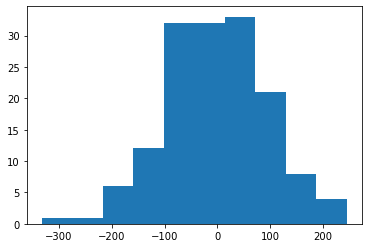

In [3]:
# Sample model with no outliers 
params = {
    "n_features": 6,
    "n_targets": 2,
    "epsilon": 0,
}
X_train, _, y_train, _ = sample(**params)

# Plot the distribution of the training labels
plt.hist(y_train[:, 0])
plt.show()

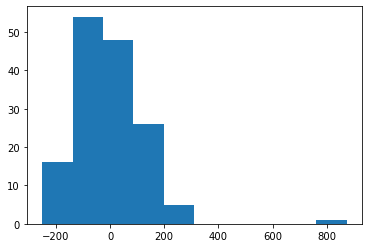

In [4]:
# Sample model with no outliers 
params["epsilon"] = 0.2
X_train, _, y_train, _ = sample(**params)

# Plot the distribution of the training labels
plt.hist(y_train[:, 0])
plt.show()

## Plot simulation results

In [5]:
df = pd.read_csv("sim_results.csv", index_col="Unnamed: 0")
df = pd.melt(
    df,
    id_vars=["n_features", "n_targets", "epsilon"],
    value_vars=["mae", "mse", "friedman_mse"],
    var_name="split",
    value_name="mse",
)
df["split"].str.upper()
df.head()

,n_features,n_targets,epsilon,split,mse
0,6.0,2.0,0.000000,mae,1.644039
1,6.0,2.0,0.010204,mae,33.780106
2,6.0,2.0,0.020408,mae,34.271623
3,6.0,2.0,0.030612,mae,29.168284
4,6.0,2.0,0.040816,mae,27.230345


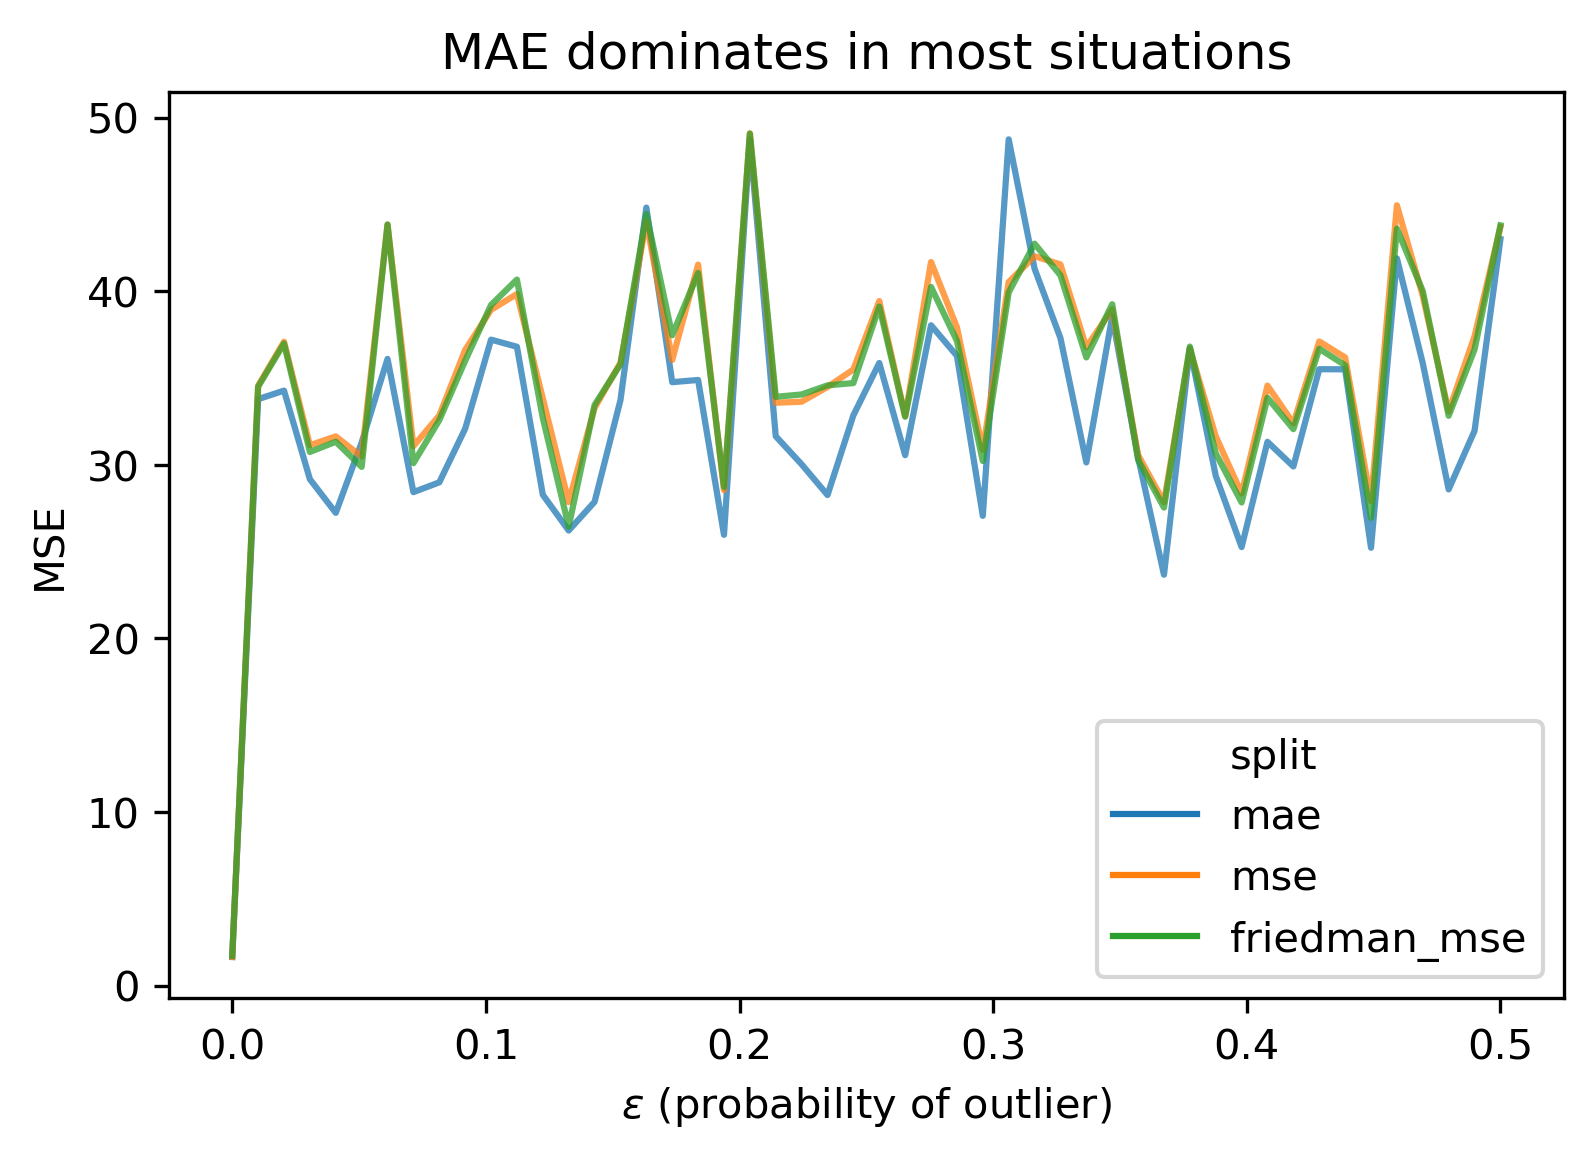

In [6]:
fig, ax = plt.subplots(dpi=300)
f = sns.lineplot(x="epsilon", y="mse", hue="split", data=df, alpha=0.75, ax=ax)
f.set(
    xlabel=r"$\epsilon$ (probability of outlier)",
    ylabel="MSE",
    title="MAE dominates in most situations"
)
plt.show()